In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


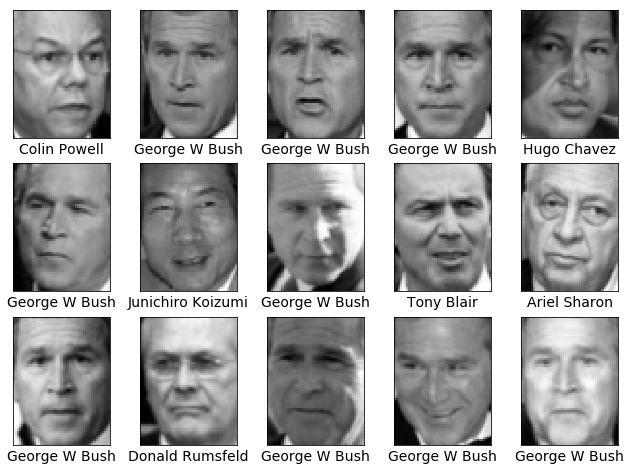

In [3]:
fig, axes = plt.subplots(3, 5, figsize=(11, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(faces.images[i], cmap='gray')
    ax.set(xticks=[], yticks=[])           
    ax.set_xlabel(faces.target_names[faces.target[i]], 
                  fontsize=14)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target,
                                                    random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler()
svc = SVC(kernel='rbf')
model = make_pipeline(scaler, svc)

param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid, cv=3)

%time grid.fit(X_train, y_train)
print(grid.best_params_)

Wall time: 3min 17s
{'svc__C': 10, 'svc__gamma': 0.0001}


In [6]:
model = grid.best_estimator_
y_pred = model.predict(X_test)

In [7]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.71      0.67      0.69        15
     Colin Powell       0.85      0.91      0.88        68
  Donald Rumsfeld       0.82      0.74      0.78        31
    George W Bush       0.89      0.89      0.89       126
Gerhard Schroeder       0.79      0.83      0.81        23
      Hugo Chavez       0.92      0.60      0.73        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.80      0.86      0.83        42

        micro avg       0.85      0.85      0.85       337
        macro avg       0.83      0.81      0.82       337
     weighted avg       0.85      0.85      0.85       337



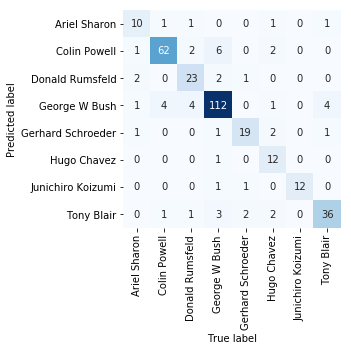

In [8]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names, cmap='Blues',
            yticklabels=faces.target_names)
plt.xlabel('True label')
plt.ylabel('Predicted label');

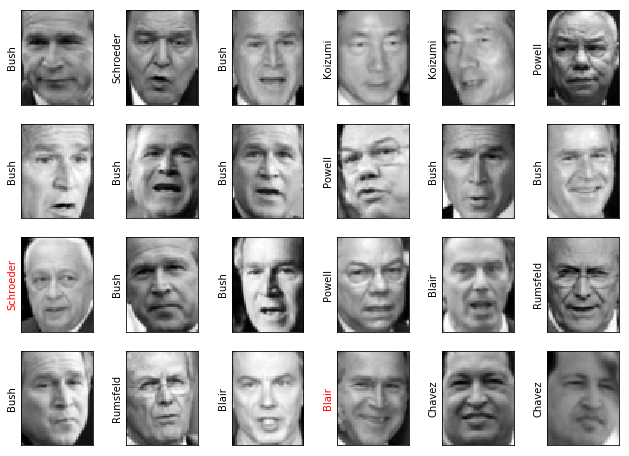

In [9]:
fig, axes = plt.subplots(4, 6, figsize=(11, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(62, 47), cmap='gray')
    ax.set(xticks=[], yticks=[])
    ax.set_ylabel(faces.target_names[y_pred[i]].split()[-1],
                  color='black' if y_pred[i] == y_test[i] else 'red')